# Analisis Performa Metode Naive Bayes dan Artificial Neural Networks dalam Deteksi Dini Kanker Serviks

Kelompok ???
- Muhammad Syaifudin Zuhri
- Adzin Naufal
- ???
- [ACHMAD RIDHO FA'IZ](https://rhindottire.github.io/Data-Mining/intro.html) (230411100197)

## Introduction

### Naive Bayes

![Naive Bayes](KK/img/naive-bayes.png)

**Naive Bayes** adalah algoritma klasifikasi probabilistik yang didasarkan pada `teorema Bayes` dengan asumsi bahwa setiap fitur dalam data saling independen satu sama lain, diberikan kelas tertentu. Asumsi independensi ini, meskipun sering kali tidak realistis, membuat algoritma ini sederhana, cepat, dan efektif untuk berbagai aplikasi, terutama dalam klasifikasi teks dan diagnosis medis.

- **Definisi**: Naive Bayes adalah algoritma klasifikasi berbasis probabilitas yang menggunakan teorema Bayes dengan asumsi bahwa fitur-fitur dalam data saling independen. Meskipun asumsi ini sederhana, algoritma ini sering kali efektif untuk berbagai tugas klasifikasi.
- **Cara Kerja**: Algoritma ini menghitung probabilitas setiap kelas berdasarkan fitur-fitur yang diberikan, lalu memilih kelas dengan probabilitas tertinggi. Ini dilakukan dengan menggabungkan probabilitas prior (berdasarkan frekuensi kelas) dan likelihood (probabilitas fitur diberikan kelas).
    - **Langkah 1**: Hitung probabilitas awal (prior) untuk setiap kelas, misalnya, persentase kasus biopsi positif (1) dan negatif (0).
    - **Langkah 2**: Hitung probabilitas fitur (likelihood) untuk setiap kelas, seperti probabilitas usia "Muda" pada kasus biopsi positif.
    - **Langkah 3**: Kombinasikan prior dan likelihood untuk menghitung probabilitas posterior, lalu pilih kelas dengan nilai tertinggi.
    - **Langkah 4**: Untuk data baru, gunakan probabilitas ini untuk memprediksi kelas.
- **Aplikasi**: Digunakan dalam klasifikasi teks (misalnya, filter spam email), analisis sentimen, dan diagnosis medis, seperti memprediksi hasil biopsi berdasarkan data kesehatan.
- **Kelebihan dan Kekurangan**: Naive Bayes cepat dan efisien untuk data berdimensi tinggi, tetapi asumsi independensi fitur dapat membatasi akurasi jika fitur-fitur saling berkorelasi.

#### Dasar Matematis: Teorema Bayes

$$
P(C_k | x) = \frac{P(C_k) \cdot P(x | C_k)}{P(x)}
$$

Di mana:
- $ C_k $: Kelas ke-$ k $ (misalnya, Biopsy=1 atau Biopsy=0).
- $ x $: Vektor fitur (misalnya, Age, Number of sexual partners, dll.).
- $ P(C_k | x) $: Probabilitas posterior, yaitu probabilitas kelas $ C_k $ diberikan fitur $ x $.
- $ P(C_k) $: Probabilitas prior, yaitu probabilitas kelas $ C_k $ sebelum melihat data.
- $ P(x | C_k) $: Probabilitas likelihood, yaitu probabilitas fitur $ x $ diberikan kelas $ C_k $.
- $ P(x) $: Probabilitas evidence, yaitu probabilitas fitur $ x $ secara keseluruhan.

Karena $ P(x) $ konstan untuk semua kelas, kita dapat menyederhanakan perbandingan probabilitas posterior menjadi:

$$
\hat{y} = \arg\max_{k} P(C_k) \cdot P(x | C_k)
$$

#### Asumsi Independensi

Asumsi utama Naive Bayes adalah bahwa fitur-fitur saling independen diberikan kelas. Dengan demikian, likelihood dapat dihitung sebagai:

$$
P(x | C_k) = \prod_{i=1}^{n} P(x_i | C_k)
$$

Di mana:
- $ x_i $: Fitur ke-$ i $.
- $ n $: Jumlah fitur.
- $ P(x_i | C_k) $: Probabilitas fitur ke-$ i $ diberikan kelas $ C_k $.

Untuk menghindari underflow (karena perkalian banyak probabilitas kecil dapat menghasilkan nilai yang sangat kecil), sering kali digunakan logaritma:

$$
\log P(x | C_k) = \sum_{i=1}^{n} \log P(x_i | C_k)
$$

#### Perhitungan Probabilitas

- **Prior Probability ($ P(C_k) $)**: Dihitung sebagai frekuensi relatif kelas dalam data pelatihan. Misalnya, dalam file Anda:
  - $ P(\text{Biopsy=1}) = 0.125 $ (12.5% kasus positif).
  - $ P(\text{Biopsy=0}) = 0.875 $ (87.5% kasus negatif).
- **Likelihood ($ P(x_i | C_k) $)**: Tergantung pada jenis fitur:
  - **Fitur Kategorikal**: Dihitung sebagai frekuensi relatif. Misalnya, dalam file Anda:
    - $ P(\text{Age='Muda'} | \text{Biopsy=1}) = 0.25 $.
    - $ P(\text{Age='Muda'} | \text{Biopsy=0}) = 0.3 $.
  - **Fitur Kontinu**: Sering diasumsikan mengikuti distribusi Gaussian:

    $$
    P(x_i | C_k) = \frac{1}{\sqrt{2\pi \sigma_{k,i}^2}} \exp\left( -\frac{(x_i - \mu_{k,i})^2}{2\sigma_{k,i}^2} \right)
    $$

    Di mana $ \mu_{k,i} $ adalah rata-rata dan $ \sigma_{k,i} $ adalah standar deviasi fitur $ i $ dalam kelas $ k $. Dalam file Anda, fitur numerik diubah menjadi kategorikal, sehingga perhitungan Gaussian tidak digunakan.

#### Penanganan Probabilitas Nol

Jika sebuah fitur tidak muncul dalam data pelatihan untuk suatu kelas, probabilitasnya akan menjadi nol, yang dapat menyebabkan $ P(x | C_k) = 0 $. Untuk mengatasi ini, digunakan teknik **smoothing**, seperti **Laplace smoothing**:

$$
P(x_i | C_k) = \frac{\text{count}(x_i, C_k) + 1}{\text{total count}(C_k) + \text{jumlah kategori}}
$$

Ini memastikan bahwa tidak ada probabilitas yang bernilai nol.

#### Advantages and Disadvantages

**Kelebihan**:
- Cepat dan efisien untuk data berdimensi tinggi.
- Mudah diimplementasikan dan diinterpretasikan.
- Berkinerja baik pada data kategorikal.
- Membutuhkan sedikit data pelatihan dibandingkan model kompleks.

**Kekurangan**:
- Asumsi independensi fitur sering kali tidak realistis, yang dapat menurunkan akurasi jika fitur berkorelasi.
- Dapat dikalahkan oleh model seperti regresi logistik atau ANN dalam kasus kompleks [Naive Bayes Classifier - Wikipedia](https://en.wikipedia.org/wiki/Naive_Bayes_classifier).
- Memerlukan penanganan probabilitas nol dengan teknik seperti Laplace smoothing.
- **Likelihood**: Probabilitas fitur diberikan kelas.

#### Naive Bayes Variants and App

Naive Bayes memiliki beberapa varian yang disesuaikan dengan jenis data:
- **Multinomial Naive Bayes**: Digunakan untuk data diskret, seperti jumlah kemunculan kata dalam klasifikasi teks. Cocok untuk fitur dengan frekuensi atau hitungan.
- **Bernoulli Naive Bayes**: Digunakan untuk data biner (hadir/tidak hadir), seperti keberadaan kata dalam dokumen.
- **Gaussian Naive Bayes**: Digunakan untuk data kontinu dengan asumsi distribusi Gaussian.

**Konsep Terkait**:
- **Teorema Bayes**: Dasar matematis untuk menghitung probabilitas bersyarat.
- **Probabilitas Bersyarat**: Probabilitas suatu peristiwa diberikan peristiwa lain telah terjadi.
- **Asumsi Independensi**: Asumsi bahwa fitur tidak saling memengaruhi, yang membuat Naive Bayes sederhana.
- **Smoothing**: Teknik seperti Laplace smoothing untuk menghindari probabilitas nol.
- **Prior dan Posterior**: Probabilitas sebelum dan setelah melihat data.

Naive Bayes sering digunakan dalam:
- **Filter Spam**: Mengklasifikasikan email sebagai spam atau bukan berdasarkan kata-kata yang ada [Naive Bayes Classifier Explained](https://www.analyticsvidhya.com/blog/2017/09/naive-bayes-explained/).
- **Analisis Sentimen**: Menentukan apakah ulasan positif atau negatif berdasarkan kata-kata [Performing Sentiment Analysis](https://www.analyticsvidhya.com/blog/2017/09/naive-bayes-explained/).
- **Diagnosis Medis**: Memprediksi penyakit, seperti dalam file Anda untuk hasil biopsi [Naïve Bayes Algorithm](https://www.kdnuggets.com/2020/06/naive-bayes-algorithm-everything.html).
- **Klasifikasi Dokumen**: Mengkategorikan dokumen ke dalam topik tertentu [Naive Bayes Classifier](https://www.simplilearn.com/tutorials/machine-learning-tutorial/naive-bayes-classifier).

#### **Key Citations**:

- [Naive Bayes Classifiers - GeeksforGeeks](https://www.geeksforgeeks.org/machine-learning/naive-bayes-classifiers/)
- [Naive Bayes Classifier - Wikipedia](https://en.wikipedia.org/wiki/Naive_Bayes_classifier)
- [Naive Bayes Classifier Explained With Practical Problems](https://www.analyticsvidhya.com/blog/2017/09/naive-bayes-explained/)
- [What Are Naïve Bayes Classifiers? | IBM](https://www.ibm.com/think/topics/naive-bayes)
- [Naive Bayes Classifier in Machine Learning - Javatpoint](https://www.javatpoint.com/machine-learning-naive-bayes-classifier)
- [Naive Bayes Classifier | Simplilearn](https://www.simplilearn.com/tutorials/machine-learning-tutorial/naive-bayes-classifier)
- [Naïve Bayes Algorithm: Everything You Need to Know](https://www.kdnuggets.com/2020/06/naive-bayes-algorithm-everything.html)
- [Naive Bayes Algorithm in ML: Simplifying Classification](https://www.turing.com/kb/an-introduction-to-naive-bayes-algorithm-for-beginners)
- [Naive Bayes Classifier Tutorial: with Python Scikit-learn](https://www.datacamp.com/tutorial/naive-bayes-scikit-learn)
- [A Simple Explanation of Naive Bayes Classification](https://stackoverflow.com/questions/10059594/a-simple-explanation-of-naive-bayes-classification)

### Artificial Neural Network

![Artificial Neural Network (ANN)](KK/img/ANN.png)

#### Basic Concept

**Artificial Neural Network** (ANN) adalah model komputasi yang terinspirasi dari struktur dan fungsi jaringan saraf biologis, seperti yang ada pada otak manusia. ANN terdiri dari sekumpulan `node` (neuron) yang saling terhubung dan disusun dalam lapisan, yaitu lapisan input, lapisan tersembunyi (hidden layer), dan lapisan output. Setiap neuron menerima input, mengolahnya dengan bobot (weight) dan bias, lalu menerapkan fungsi aktivasi untuk menghasilkan output. ANN digunakan untuk memodelkan pola-pola kompleks dalam data, seperti dalam klasifikasi, regresi, atau pengenalan pola, dan sering diterapkan dalam bidang seperti pengenalan gambar, pemrosesan bahasa alami (NLP), dan diagnosis medis.

#### Forward and Backpropagation Process

##### Forward Propagation

Forward propagation adalah langkah pertama dalam menggunakan ANN untuk membuat prediksi, Data masukan dilewatkan melalui jaringan untuk menghasilkan prediksi, menggunakan bobot dan fungsi aktivasi seperti sigmoid. Proses ini melibatkan:
- Setiap neuron dalam lapisan tersembunyi menghitung outputnya dengan rumus:

  $$
  \text{output} = \sigma\left( \sum_{i} w_i \cdot x_i + b \right)
  $$

  Di mana:
  - $ w_i $ adalah bobot untuk input ke-i.
  - $ x_i $ adalah nilai input ke-i.
  - $ b $ adalah bias.
  - $ \sigma $ adalah fungsi aktivasi, dalam kasus ini kemungkinan sigmoid, karena output H1 dan H2 mendekati 0 atau 1, dengan rumus:

    $$
    \sigma(z) = \frac{1}{1 + e^{-z}}
    $$

- Output dari lapisan tersembunyi kemudian digunakan sebagai input untuk lapisan output, menghasilkan prediksi akhir (Prediksi_Final).

Dalam file Anda, contohnya untuk baris pertama data (Age=18, Number of sexual partners=4, dll.), output H1 adalah 0.9999995477 dan H2 adalah 0.9999999327, yang kemudian menghasilkan Prediksi_Final = 0.4240051204.

##### Backpropagation

Backpropagation adalah algoritma untuk melatih ANN dengan menyesuaikan bobot dan bias agar prediksi menjadi lebih akurat, Kesalahan prediksi dihitung (misalnya, dengan MSE), lalu gradien dihitung untuk menyesuaikan bobot, menggunakan learning rate untuk mengontrol perubahan.  
Langkah-langkahnya adalah:
- **Forward Pass**: Hitung output jaringan untuk input yang diberikan.
- **Hitung Loss**: Bandingkan output prediksi dengan nilai target (misalnya, Biopsy) untuk menghitung kesalahan, loss dihitung menggunakan Mean Squared Error (MSE):

   $$
   \text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
   $$

   Di mana $ y_i $ adalah nilai target, dan $ \hat{y}_i $ adalah prediksi. Contoh, MSE untuk baris pertama adalah 0.0898901711.
- **Backward Pass**: Hitung gradien (turunan) dari loss terhadap setiap bobot dan bias menggunakan aturan rantai (chain rule). Gradien ini menunjukkan seberapa besar pengaruh setiap bobot terhadap loss, gradien dihitung untuk lapisan output (Gradien_Output) dan lapisan tersembunyi (Gradien_H1, Gradien_H2), misalnya Gradien_Output = -0.1035525565 untuk baris pertama.
- **Update Bobot**: Sesuaikan bobot dan bias menggunakan gradien dan learning rate:

   $$
   w_{\text{new}} = w_{\text{old}} - \eta \cdot \frac{\partial \text{loss}}{\partial w}
   $$

   Di mana $ \eta $ adalah learning rate, Anda bernilai 0.5. Pembaruan ini terlihat dalam perbandingan "Parameter Awal" dan "Parameter Baru", misalnya bias untuk H1 berubah dari 3.4999952702 menjadi 3.9999952702.

#### Struktur dan Komponen ANN

- **Lapisan Input**: Menerima data masukan, dalam kasus ini 17 fitur seperti Age, Number of sexual partners, First sexual intercourse, Num of pregnancies, Smokes, dan lain-lain.
- **Lapisan Tersembunyi**: Dalam file Anda, ada 2 neuron tersembunyi (H1 dan H2), yang memproses data dari lapisan input untuk menghasilkan representasi yang lebih kompleks.
- **Lapisan Output**: Menghasilkan prediksi akhir, dalam hal ini untuk variabel target Biopsy (0 atau 1).

Setiap koneksi antara neuron memiliki bobot, yang menentukan kekuatan hubungan, dan setiap neuron memiliki bias untuk menggeser nilai output. Dalam file, bobot awal dan bobot baru setelah pelatihan tercatat, misalnya bobot input ke H1 berubah dari [0.2999634, 0.4299965, ...] menjadi [0.2999633736, 0.4299965073, ...], menunjukkan pembaruan melalui pelatihan.

#### Parameter dan Hasil Pelatihan

- **Learning Rate**: 0.5, digunakan untuk mengontrol seberapa besar bobot diperbarui.
- **Parameter Awal**: Bobot dan bias awal untuk koneksi input ke H1, H2, dan dari tersembunyi ke output, misalnya bobot input->H1: w1=0.2999634, w2=0.4299965, dll.
- **Parameter Baru**: Bobot dan bias setelah pelatihan, menunjukkan pembaruan berdasarkan gradien, misalnya bobot input->H1: w1_new=0.2999633736, dll.
- **Hasil**: Akurasi pelatihan mencapai 100%, dengan semua prediksi (Prediksi) sesuai dengan nilai target (Biopsy), seperti terlihat pada kolom "Benar" yang menunjukkan "Benar" untuk beberapa baris.

#### Advantages and Disadvantages

ANN digunakan dalam berbagai bidang, termasuk:
- **Pengenalan Gambar**: Klasifikasi gambar, deteksi objek, seperti yang dijelaskan di [Neural Networks and Deep Learning](http://neuralnetworksanddeeplearning.com/chap2.html).
- **Natural Language Processing (NLP)**: Analisis sentimen, penerjemahan mesin, seperti yang disebutkan di [A Comprehensive Guide to the Backpropagation Algorithm in Neural Networks](https://neptune.ai/blog/backpropagation-algorithm-in-neural-networks-guide).
- **Prediksi Time Series**: Peramalan harga saham, cuaca, seperti yang dijelaskan di [Understanding Backpropagation | Towards Data Science](https://towardsdatascience.com/understanding-backpropagation-abcc509ca9d0/).
- **Diagnosis Medis**: Prediksi penyakit berdasarkan data pasien, seperti dalam file Anda yang mungkin terkait dengan skrining kanker serviks, seperti yang disebutkan di [How Does Backpropagation in a Neural Network Work? | Built In](https://builtin.com/machine-learning/backpropagation-neural-network).

Kelebihan ANN meliputi:
- Dapat memodelkan hubungan non-linear yang kompleks, seperti yang dijelaskan di [Backpropagation - Wikipedia](https://en.wikipedia.org/wiki/Backpropagation).
- Mampu belajar dari data dalam jumlah besar, seperti yang disebutkan di [Back Propagation in Neural Network: Machine Learning Algorithm](https://www.guru99.com/backpropogation-neural-network.html).
- Dapat digeneralisasikan pada data baru, meskipun rentan terhadap overfitting jika tidak diregulasi dengan baik, seperti yang dijelaskan di [Neural Networks: Training using backpropagation | Machine Learning | Google for Developers](https://developers.google.com/machine-learning/crash-course/neural-networks/backpropagation).

Kekurangan ANN meliputi:
- Memerlukan banyak data untuk pelatihan, seperti yang disebutkan di [What is Backpropagation? | IBM](https://www.ibm.com/think/topics/backpropagation).
- Rentan terhadap overfitting jika tidak diregulasi, seperti yang dijelaskan di [A Step by Step Backpropagation Example | Matt Mazur](https://mattmazur.com/2015/03/17/a-step-by-step-backpropagation-example/).
- Interpretabilitas rendah, sulit untuk menjelaskan bagaimana model membuat keputusan, seperti yang disebutkan di [Backpropagation in Neural Network - GeeksforGeeks](https://www.geeksforgeeks.org/machine-learning/backpropagation-in-neural-network/).

#### Key Citations

- [Neural Networks and Deep Learning explanation](http://neuralnetworksanddeeplearning.com/chap2.html)
- [Backpropagation detailed Wikipedia page](https://en.wikipedia.org/wiki/Backpropagation)
- [Comprehensive Backpropagation Guide in Neural Networks](https://neptune.ai/blog/backpropagation-algorithm-in-neural-networks-guide)
- [Backpropagation in Neural Networks explanation](https://builtin.com/machine-learning/backpropagation-neural-network)
- [Backpropagation in Neural Network tutorial](https://www.geeksforgeeks.org/machine-learning/backpropagation-in-neural-network/)
- [Backpropagation machine learning technique](https://www.ibm.com/think/topics/backpropagation)
- [Neural Networks Training with Backpropagation](https://developers.google.com/machine-learning/crash-course/neural-networks/backpropagation)
- [Back Propagation in Neural Network guide](https://www.guru99.com/backpropogation-neural-network.html)
- [Step by Step Backpropagation Example](https://mattmazur.com/2015/03/17/a-step-by-step-backpropagation-example/)
- [Understanding Backpropagation detailed article](https://towardsdatascience.com/understanding-backpropagation-abcc509ca9d0/)

## Assignment To-Do

## Manual Calculation

### Naive Bayes

```python
import os, subprocess
file_path = os.path.abspath('KK/resource/naive-bayes.xlsx')
try:
    subprocess.run(['start', '', file_path], shell=True)
except Exception as e:
    print("Something went wrong:", e)
```

#### 1. **Data Mentah (Raw Data)**

Bagian pertama file berisi tabel dengan data numerik yang mencakup berbagai atribut kesehatan dan demografis dari individu. Kolom-kolom yang ada adalah:

- **Age**: Usia individu (contoh: 18, 15, 34).
- **Number of sexual partners**: Jumlah pasangan seksual (contoh: 4, 1, 5).
- **First sexual intercourse**: Usia saat pertama kali berhubungan seksual (contoh: 15, 14, 17).
- **Num of pregnancies**: Jumlah kehamilan (contoh: 1, 4, 6).
- **Smokes**: Apakah individu merokok (1 = ya, 0 = tidak).
- **Smokes (years)**: Lama merokok dalam tahun (contoh: 37, 1.27).
- **Smokes (packs/year)**: Jumlah bungkus rokok per tahun (contoh: 37, 2.8).
- **Hormonal Contraceptives**: Penggunaan kontrasepsi hormonal (1 = ya, 0 = tidak).
- **Hormonal Contraceptives (years)**: Lama penggunaan kontrasepsi hormonal dalam tahun (contoh: 3, 15).
- **IUD**: Penggunaan alat kontrasepsi dalam rahim (1 = ya, 0 = tidak).
- **IUD (years)**: Lama penggunaan IUD dalam tahun (contoh: 7).
- **STDs**: Apakah individu memiliki penyakit menular seksual (1 = ya, 0 = tidak).
- **STDs (number)**: Jumlah penyakit menular seksual yang dimiliki.
- **STDs: Number of diagnosis**: Jumlah diagnosis penyakit menular seksual.
- **Hinselmann, Schiller, Citology**: Tes skrining untuk kanker serviks (1 = positif, 0 = negatif).
- **Biopsy**: Hasil biopsi (1 = positif, 0 = negatif), yang menjadi variabel target untuk klasifikasi.

Contoh baris data:
- 18, 4, 15, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0
- 51, 3, 17, 6, 1, 34, 3.4, 0, 0, 1, 7, 0, 0, 0, 1, 1, 0, 1

#### 2. **Pemetaan Kategorikal**

Data numerik dikelompokkan ke dalam kategori untuk beberapa atribut.  
Pemetaan ini digunakan untuk mengubah data kontinu menjadi kategorikal agar sesuai dengan model Naive Bayes:

- **Age**:
  - $ < 25 $ = 'Muda'
  - $ 25 - 40 $ = 'Dewasa'
  - $ > 40 $ = 'Tua'
- **Number of sexual partners**:
  - $ <= 2 $ = 'Sedikit'
  - $ 3 - 5 $ = 'Sedang'
  - $ > 5 $ = 'Banyak'
- **First sexual intercourse**:
  - $ <= 16 $ = 'Sangat Muda'
  - $ 17 - 20 $ = 'Muda'
  - $ > 20 $ = 'Dewasa'
- **Num of pregnancies**:
  - $ <= 1 $ = 'Rendah'
  - $ 2 - 4 $ = 'Sedang'
  - $ > 20 $ = 'Tinggi' (Catatan: Dalam konteks data, kemungkinan maksudnya > 4, karena nilai maksimum dalam data adalah 6).

Untuk atribut lain seperti "Smokes (years)" atau "Hormonal Contraceptives (years)", pemetaan kategorikal juga ada, misalnya:
- **Smokes (years)**: Tidak Merokok, Perokok Baru, Perokok Lama.
- **Hormonal Contraceptives (years)**: Tidak Menggunakan HC, Pengguna Jangka Menengah, Pengguna Jangka Panjang.

#### 3. **Data yang Ditransformasikan**

Berikut adalah data mentah yang telah diubah menjadi label kategorikal berdasarkan pemetaan di atas::
- Baris pertama (18, 4, 15, 1, ...) menjadi:
  - Age: 'Muda'
  - Number of sexual partners: 'Sedang'
  - First sexual intercourse: 'Sangat Muda'
  - Num of pregnancies: 'Rendah'
  - Smokes: 0 (Tidak Merokok)
  - Dan seterusnya.

Contoh baris:
- Muda, Sedang, Sangat Muda, Rendah, 0, Tidak Merokok, Tidak Merokok, 0, Tidak Menggunakan HC, 0, Tidak Menggunakan IUD, 0, 0, 0, 0, 0, 0, 0
- Tua, Sedang, Muda, Tinggi, 1, Perokok Lama, Perokok Berat, 0, Tidak Menggunakan HC, 1, Pengguna IUD, 0, 0, 0, 1, 1, 0, 1

#### 4. **Perhitungan Probabilitas untuk Naive Bayes**

Probabilitas yang digunakan dalam model Naive Bayes untuk memprediksi "Biopsy" (positif atau negatif):

- **Prior Probabilities (Probabilitas Awal)**:
  - $ P(\text{Biopsy}=1) = 0.125 $ (12.5% kasus positif)
  - $ P(\text{Biopsy}=0) = 0.875 $ (87.5% kasus negatif)

- **Likelihood (Probabilitas Bersyarat)**:
  Probabilitas untuk setiap kategori fitur dihitung berdasarkan data pelatihan (80% dari data). Contoh:
  - **Age**:
    - $ P(\text{Muda} | \text{Biopsy}=1) = 0.25 $
    - $ P(\text{Muda} | \text{Biopsy}=0) = 0.3 $
    - $ P(\text{Tua} | \text{Biopsy}=1) = 0.5 $
    - $ P(\text{Tua} | \text{Biopsy}=0) = 0.4 $
  - **Number of sexual partners**:
    - $ P(\text{Sedikit} | \text{Biopsy}=1) = 0.25 $
    - $ P(\text{Sedikit} | \text{Biopsy}=0) = 0.40 $
  - Dan seterusnya untuk semua fitur seperti "Smokes", "Hormonal Contraceptives", dll.

Probabilitas ini digunakan untuk menghitung kemungkinan suatu instance termasuk dalam kelas Biopsy=1 atau Biopsy=0.

#### 5. **Data Pengujian dan Hasil Evaluasi**

Bagian terakhir berisi data pengujian (kemungkinan 20% dari data) untuk menguji model Naive Bayes. Setiap instance pengujian mencakup:
- Nilai fitur dalam bentuk kategorikal.
- Skor likelihood untuk Biopsy=1 dan Biopsy=0.
- Prediksi berdasarkan skor likelihood yang lebih tinggi.

Contoh:
- **Data Testing 1**:
  - Fitur: Tua, Sedikit, Muda, Tinggi, 0, Tidak Merokok, dll.
  - Likelihood Biopsy=1: 0.0000000101611
  - Likelihood Biopsy=0: 0.0000407789557
  - Prediksi: 0 (karena likelihood Biopsy=0 lebih tinggi)
- **Data Testing 2**:
  - Fitur: Tua, Sedang, Sangat Muda, Sedang, 0, Perokok Baru, dll.
  - Likelihood Biopsy=1: 0.0000000101611
  - Likelihood Biopsy=0: 0.0000208055896
  - Prediksi: 0

- **Akurasi**: 100.00%, yang menunjukkan bahwa model memprediksi dengan benar untuk kedua instance pengujian yang ada.

### Artificial Neural Network

**Artificial Neural Network (ANN)** dengan algoritma **backpropagation** untuk klasifikasi

```python
import os, subprocess
file_path = os.path.abspath('KK/resource/ANN_Backpropagation.xlsx')
try:
    subprocess.run(['start', '', file_path], shell=True)
except Exception as e:
    print("Something went wrong:", e)
```

#### 1. **Data Mentah dan Hasil Perhitungan ANN**

Data kesehatan dan demografis yang digunakan sebagai input untuk model ANN, bersama dengan hasil perhitungan jaringan saraf. Kolom-kolom dalam tabel ini adalah:

- **Fitur Input** (sama seperti pada file "naive bayes.xlsx"):
  - **Age**: Usia individu (contoh: 18, 15, 34).
  - **Number of sexual partners**: Jumlah pasangan seksual (contoh: 4, 1, 5).
  - **First sexual intercourse**: Usia saat pertama kali berhubungan seksual (contoh: 15, 14, 17).
  - **Num of pregnancies**: Jumlah kehamilan (contoh: 1, 4, 6).
  - **Smokes**: Apakah individu merokok (1 = ya, 0 = tidak).
  - **Smokes (years)**: Lama merokok dalam tahun (contoh: 37, 1.27).
  - **Smokes (packs/year)**: Jumlah bungkus rokok per tahun (contoh: 37, 2.8).
  - **Hormonal Contraceptives**: Penggunaan kontrasepsi hormonal (1 = ya, 0 = tidak).
  - **Hormonal Contraceptives (years)**: Lama penggunaan kontrasepsi hormonal (contoh: 3, 15).
  - **IUD**: Penggunaan alat kontrasepsi dalam rahim (1 = ya, 0 = tidak).
  - **IUD (years)**: Lama penggunaan IUD (contoh: 7).
  - **STDs**: Apakah individu memiliki penyakit menular seksual (1 = ya, 0 = tidak).
  - **STDs (number)**: Jumlah penyakit menular seksual.
  - **STDs: Number of diagnosis**: Jumlah diagnosis penyakit menular seksual.
  - **Hinselmann, Schiller, Citology**: Tes skrining untuk kanker serviks (1 = positif, 0 = negatif).
  - **Biopsy**: Hasil biopsi (1 = positif, 0 = negatif), variabel target untuk klasifikasi.

- **Kolom Hasil ANN**:
  - **Output_H1**: Keluaran dari neuron pertama di lapisan tersembunyi (hidden layer) setelah aktivasi (nilai mendekati 0 atau 1, kemungkinan menggunakan fungsi aktivasi sigmoid).
  - **Output_H2**: Keluaran dari neuron kedua di lapisan tersembunyi.
  - **Prediksi_Final**: Keluaran akhir dari model ANN (nilai kontinu antara 0 dan 1, kemungkinan setelah fungsi aktivasi sigmoid).
  - **MSE**: Mean Squared Error, mengukur kesalahan antara prediksi dan nilai target (Biopsy).
  - **Gradien_Output**: Gradien untuk lapisan keluaran, digunakan dalam backpropagation untuk memperbarui bobot.
  - **Gradien_H1**: Gradien untuk neuron pertama di lapisan tersembunyi.
  - **Gradien_H2**: Gradien untuk neuron kedua di lapisan tersembunyi.
  - **Prediksi**: Hasil prediksi biner (0 atau 1) berdasarkan ambang batas tertentu dari Prediksi_Final.
  - **Benar**: Menunjukkan apakah prediksi sesuai dengan nilai Biopsy (contoh: "Benar" atau kosong).

- **Akurasi**: Di bagian bawah tabel, akurasi model dicatat sebagai **100%**, menunjukkan bahwa semua prediksi pada data yang diberikan sesuai dengan nilai target (Biopsy).

Contoh baris data:
- 18, 4, 15, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, **Output_H1**: 0.9999995477, **Output_H2**: 0.9999999327, **Prediksi_Final**: 0.4240051204, **MSE**: 0.0898901711, **Prediksi**: 0, **Benar**: 0.
- 51, 3, 17, 6, 1, 34, 3.4, 0, 0, 1, 7, 0, 0, 0, 1, 1, 0, 1, **Output_H1**: 1, **Output_H2**: 0.9996554061, **Prediksi_Final**: 0.4240081094, **MSE**: 0.165883329, **Prediksi**: 0, **Benar**: (kosong).

#### 2. **Parameter Model**

Parameter awal dan pembaruan bobot model ANN setelah pelatihan dengan backpropagation.

- **Learning Rate**: 0.5 (digunakan untuk mengontrol seberapa besar pembaruan bobot pada setiap iterasi).

- **Parameter Awal**:
  - **Bobot input->H1**: Bobot dari lapisan input ke neuron pertama di lapisan tersembunyi (w1 hingga w17, b1 untuk bias). Contoh: w1 = 0.2999634, w2 = 0.4299965, b1 = 3.4999952702.
  - **Bobot input->H2**: Bobot dari lapisan input ke neuron kedua di lapisan tersembunyi (w1 hingga w17, b1 untuk bias). Contoh: w1 = 0.2497639, w2 = 0.4799858, b1 = 3.4999903077.
  - **Bobot Hidden->out**: Bobot dari lapisan tersembunyi ke lapisan keluaran (dua bobot untuk H1 dan H2). Contoh: 0.0345664163, -0.0354774758.
  - **Bias H3 & Output**: Bias untuk lapisan keluaran (b3 = -0.3054421666).

- **Parameter Baru**:
  Setelah pelatihan dengan backpropagation, bobot dan bias diperbarui. Contoh:
  - **Bobot input->H1**: w1_new = 0.2999633736, w2_new = 0.4299965073, b1_new = 3.9999952702.
  - **Bobot input->H2**: w1_new = 0.2497638904, w2_new = 0.4799831939, b1_new = 3.9999885886.
  - **Bobot Hidden->out**: 0.104902293, 0.0348341636.
  - **Bias H3 & Output**: b3_new = -0.2351062899.

Pembaruan ini dilakukan berdasarkan gradien (Gradien_Output, Gradien_H1, Gradien_H2) dan learning rate untuk meminimalkan MSE.

#### 3. **Struktur Jaringan ANN**

Berdasarkan data, struktur ANN yang digunakan adalah:
- **Lapisan Input**: 17 fitur (Age, Number of sexual partners, ..., Citology).
- **Lapisan Tersembunyi**: 2 neuron (H1 dan H2), dengan fungsi aktivasi (kemungkinan sigmoid, karena keluaran mendekati 0 atau 1).
- **Lapisan Keluaran**: 1 neuron untuk prediksi Biopsy (nilai kontinu antara 0 dan 1, yang kemudian diubah menjadi biner 0 atau 1).
- **Fungsi Aktivasi**: Sigmoid (dilihat dari nilai Output_H1, Output_H2, dan Prediksi_Final).
- **Fungsi Kerugian**: Mean Squared Error (MSE) untuk menghitung kesalahan prediksi.
- **Algoritma Pembelajaran**: Backpropagation, dengan pembaruan bobot berdasarkan gradien dan learning rate.

## Data Mining Process (`CRISP-DM`)

### 1. Business Understanding

#### 1.1. Define the Problem

Kanker serviks merupakan salah satu penyakit kanker yang paling sering ditemukan pada wanita di seluruh dunia. Deteksi dini sangat penting untuk meningkatkan peluang kesembuhan dan mengurangi angka kematian. Biasanya, deteksi dini dilakukan melalui tes skrining seperti Pap smear, kolposkopi, atau biopsi, yang membutuhkan waktu, biaya, dan tenaga medis yang terlatih. Dengan adanya teknologi pembelajaran mesin (machine learning), kita dapat memanfaatkan data riwayat kesehatan pasien dan faktor risiko untuk memprediksi kemungkinan kanker serviks secara lebih cepat dan efisien. Dalam tugas ini, kita akan fokus pada dua metode machine learning, yaitu **Naive Bayes** dan **Artificial Neural Networks (ANN)**, untuk mendeteksi kanker serviks berdasarkan dataset yang tersedia.

#### 1.2. Set Objectives

Objektif bisnis dari proyek ini adalah:  
- Mengevaluasi performa model Naive Bayes dan ANN berdasarkan metrik seperti akurasi, sensitivitas, dan spesifisitas dalam memprediksi kanker serviks.  
- Membandingkan efisiensi dan keandalan kedua model untuk diterapkan dalam lingkungan klinis.  
- Menyediakan alat bantu berbasis data yang dapat membantu tenaga medis mengidentifikasi pasien berisiko tinggi dengan lebih cepat dan akurat.  

Tujuan utama dari proyek ini adalah:  
- Menganalisis dan membandingkan performa model **Naive Bayes** dan **Artificial Neural Networks (ANN)** dalam memprediksi hasil biopsi kanker serviks (positif atau negatif) menggunakan data faktor risiko dan hasil tes skrining.  
- Menentukan model mana yang lebih akurat dan cocok untuk membantu tenaga medis dalam proses deteksi dini kanker serviks.  

Proyek ini bertujuan untuk memberikan wawasan yang dapat mendukung pengambilan keputusan di bidang kesehatan, khususnya dalam skrining kanker serviks.

#### 1.3. Identify Stakeholders

Proyek ini melibatkan beberapa pihak yang berkepentingan, antara lain:  
- **Tenaga Medis**: Dokter, perawat, dan spesialis yang menggunakan hasil prediksi untuk mendiagnosis dan merencanakan perawatan pasien.  
- **Pasien**: Wanita yang menjadi target skrining untuk deteksi dini kanker serviks.  
- **Peneliti Medis**: Akademisi atau ilmuwan yang ingin mengembangkan metode deteksi berbasis data yang lebih baik.  
- **Penyedia Layanan Kesehatan**: Rumah sakit atau klinik yang dapat meningkatkan efisiensi layanan skrining mereka.  
- **Perusahaan Asuransi Kesehatan**: Pihak yang mungkin tertarik pada metode prediksi untuk mengurangi biaya perawatan jangka panjang.  

#### 1.4. Define Success Criteria

Keberhasilan proyek ini akan diukur dengan beberapa indikator berikut:  
- **Akurasi**: Persentase prediksi yang benar dibandingkan dengan total data.  
- **Sensitivitas (Recall)**: Kemampuan model untuk mendeteksi semua kasus positif (pasien dengan kanker serviks).  
- **Spesifisitas**: Kemampuan model untuk mengidentifikasi kasus negatif (pasien yang tidak memiliki kanker serviks).  
- **Area Under the Curve (AUC)**: Ukuran performa keseluruhan model dalam klasifikasi.  
- **Generalisasi**: Kemampuan model untuk bekerja dengan baik pada data baru yang belum pernah dilihat sebelumnya.  

Dalam konteks medis, sensitivitas sangat penting karena kita ingin meminimalkan kasus positif yang terlewat (false negatives).

#### 1.5. Dataset Used

Dataset yang digunakan adalah `cervical-cancer.xlsx`, yang berisi 835 entri dengan 36 kolom fitur terkait riwayat kesehatan dan hasil tes pasien. Beberapa fitur utama meliputi:  
- **Age**: Usia pasien.  
- **Number of sexual partners**: Jumlah pasangan seksual.  
- **First sexual intercourse**: Usia saat pertama kali berhubungan seksual.  
- **Num of pregnancies**: Jumlah kehamilan.  
- **Smokes**: Status merokok pasien.  
- **Hormonal Contraceptives**: Penggunaan kontrasepsi hormonal.  
- **STDs**: Riwayat penyakit menular seksual.  
- **Hinselmann, Schiller, Citology**: Hasil tes skrining.  
- **Biopsy**: Hasil biopsi sebagai variabel target (1 untuk positif kanker, 0 untuk negatif).  

Dari informasi dataset, terlihat bahwa ada beberapa kolom dengan nilai yang hilang (missing values), seperti `STDs: Time since first diagnosis` (hanya 71 non-null dari 835 entri). Hal ini akan ditangani pada tahap pra-pemrosesan data.

### 2. Data Understanding

In [108]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### 2.1. Collect Data

Pada tahap ini, kita mengidentifikasi dan mengumpulkan data dari sumber yang tersedia, seperti database, file (CSV, Excel), atau API. Dalam kasus deteksi dini kanker serviks, kita menggunakan dataset `cervical-cancer.xlsx` yang berisi 835 entri dan 36 kolom fitur, termasuk usia, jumlah pasangan seksual, riwayat kehamilan, status merokok, penggunaan kontrasepsi, dan hasil tes skrining (Hinselmann, Schiller, Citology, Biopsy). Data ini relevan karena mencakup faktor risiko kanker serviks dan hasil tes yang menjadi target prediksi.

In [109]:
df = pd.read_excel('KK-UAS/data/cervical-cancer.xlsx')
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 835 entries, 0 to 834
Data columns (total 36 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Age                                 835 non-null    int64  
 1   Number of sexual partners           810 non-null    float64
 2   First sexual intercourse            828 non-null    float64
 3   Num of pregnancies                  779 non-null    float64
 4   Smokes                              822 non-null    float64
 5   Smokes (years)                      822 non-null    float64
 6   Smokes (packs/year)                 822 non-null    float64
 7   Hormonal Contraceptives             732 non-null    float64
 8   Hormonal Contraceptives (years)     732 non-null    float64
 9   IUD                                 723 non-null    float64
 10  IUD (years)                         723 non-null    float64
 11  STDs                                735 non-n

#### 2.2. Describe Data

Kita memeriksa jumlah baris dan kolom, tipe data setiap kolom (numerik, kategorikal, dll.), serta statistik deskriptif seperti mean, median, mode, dan standar deviasi. Ini membantu kita memahami karakteristik dasar data sebelum analisis lebih lanjut.

In [110]:
print("Statistik Deskriptif:")
print(df.describe())

Statistik Deskriptif:
              Age  Number of sexual partners  First sexual intercourse  \
count  835.000000                 810.000000                828.000000   
mean    27.023952                   2.551852                 17.020531   
std      8.482986                   1.676686                  2.817000   
min     13.000000                   1.000000                 10.000000   
25%     21.000000                   2.000000                 15.000000   
50%     26.000000                   2.000000                 17.000000   
75%     32.000000                   3.000000                 18.000000   
max     84.000000                  28.000000                 32.000000   

       Num of pregnancies      Smokes  Smokes (years)  Smokes (packs/year)  \
count          779.000000  822.000000      822.000000           822.000000   
mean             2.304236    0.149635        1.253850             0.465823   
std              1.455817    0.356930        4.140727             2.256273   

#### 2.3. Explore Data

EDA melibatkan visualisasi data untuk memahami distribusi fitur, hubungan antar variabel, dan mendeteksi outlier. Alat visualisasi seperti histogram, box plot, dan scatter plot sangat membantu dalam tahap ini.

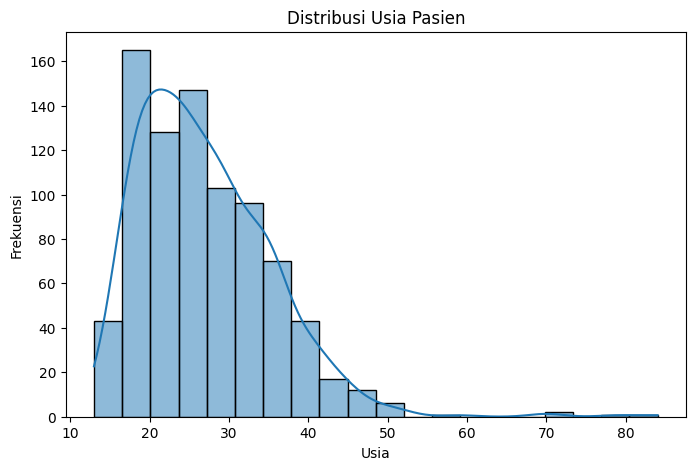

In [111]:
# Histogram untuk distribusi usia
plt.figure(figsize=(8, 5))
sns.histplot(df['Age'], bins=20, kde=True)
plt.title('Distribusi Usia Pasien')
plt.xlabel('Usia')
plt.ylabel('Frekuensi')
plt.show()

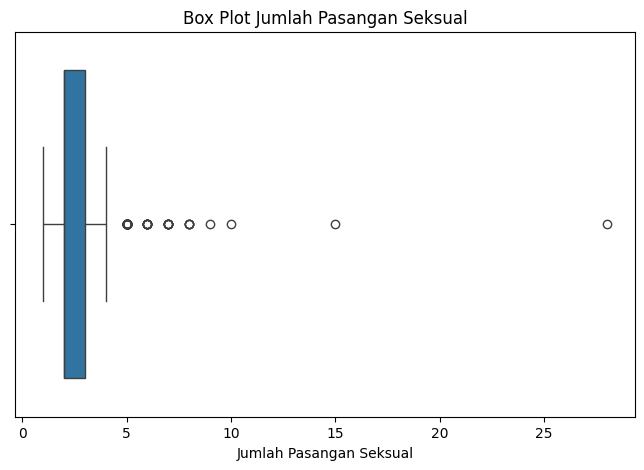

In [112]:
# Box plot untuk mendeteksi outlier pada 'Number of sexual partners'
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['Number of sexual partners'])
plt.title('Box Plot Jumlah Pasangan Seksual')
plt.xlabel('Jumlah Pasangan Seksual')
plt.show()

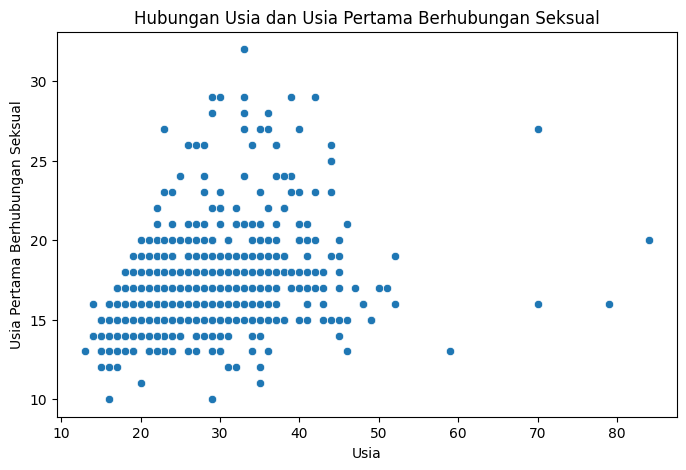

In [113]:
# Scatter plot untuk hubungan antara 'Age' dan 'First sexual intercourse'
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Age', y='First sexual intercourse', data=df)
plt.title('Hubungan Usia dan Usia Pertama Berhubungan Seksual')
plt.xlabel('Usia')
plt.ylabel('Usia Pertama Berhubungan Seksual')
plt.show()

- **Histogram**: Menunjukkan distribusi usia pasien, membantu kita melihat apakah data condong ke usia tertentu.  
- **Box Plot**: Mengidentifikasi outlier pada jumlah pasangan seksual (nilai ekstrem di luar kuartil).  
- **Scatter Plot**: Menampilkan hubungan antara usia dan usia pertama berhubungan seksual, yang bisa mengungkap pola tertentu.

#### 2.4. Verify Data Quality

Kualitas data sangat penting untuk keakuratan analisis atau model. Kita perlu memeriksa apakah ada nilai yang hilang (missing values), inkonsistensi (misalnya, usia negatif), atau outlier yang tidak masuk akal. Setelah itu, kita bisa memutuskan cara menanganinya (misalnya, imputasi atau penghapusan).

In [114]:
# Memeriksa missing values
print("Jumlah Missing Values per Kolom:")
print(df.isnull().sum())

Jumlah Missing Values per Kolom:
Age                                     0
Number of sexual partners              25
First sexual intercourse                7
Num of pregnancies                     56
Smokes                                 13
Smokes (years)                         13
Smokes (packs/year)                    13
Hormonal Contraceptives               103
Hormonal Contraceptives (years)       103
IUD                                   112
IUD (years)                           112
STDs                                  100
STDs (number)                         100
STDs:condylomatosis                   100
STDs:cervical condylomatosis          100
STDs:vaginal condylomatosis           100
STDs:vulvo-perineal condylomatosis    100
STDs:syphilis                         100
STDs:pelvic inflammatory disease      100
STDs:genital herpes                   100
STDs:molluscum contagiosum            100
STDs:AIDS                             100
STDs:HIV                              100
S

In [115]:
# Memeriksa inkonsistensi (usia negatif)
print("Jumlah Baris dengan Usia Negatif:")
print((df['Age'] < 0).sum())

Jumlah Baris dengan Usia Negatif:
0


In [116]:
# Memeriksa outlier (usia di atas 100)
print("Jumlah Baris dengan Usia di Atas 100 Tahun:")
print((df['Age'] > 100).sum())

Jumlah Baris dengan Usia di Atas 100 Tahun:
0


- Jika ada missing values, kita bisa mengisi dengan mean/median atau menghapus baris yang bermasalah.  
- Jika ada outlier, kita evaluasi apakah itu valid (misalnya, usia 90 masih mungkin) atau kesalahan (misalnya, usia 200).

### 3. Data Preparation

In [117]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif

#### 3.1. Data Cleaning

- Menghapus kolom `STDs: Time since first diagnosis` dan `STDs: Time since last diagnosis` karena memiliki 91.5% data hilang (71 non-null dari 835 entri).
- Mengisi missing values pada kolom numerik (`Number of sexual partners`, `Num of pregnancies`, `First sexual intercourse`) dengan median.
- Mengisi missing values pada kolom kategorikal (`Hormonal` `Contraceptives`, `IUD, Smokes`) dengan modus.
- Menghapus duplikat untuk memastikan data unik.

In [118]:
# Menghapus kolom dengan missing values ekstrem (>90% hilang)
df = df.drop(columns=['STDs: Time since first diagnosis', 'STDs: Time since last diagnosis'])

# Mengisi missing values pada kolom numerik dengan median
numeric_cols = ['Number of sexual partners', 'First sexual intercourse', 'Num of pregnancies',
                'Smokes (years)', 'Smokes (packs/year)', 'Hormonal Contraceptives (years)', 
                'IUD (years)']
for col in numeric_cols:
    df[col] = df[col].fillna(df[col].median())

# Mengisi missing values pada kolom kategorikal dengan modus
categorical_cols = ['Smokes', 'Hormonal Contraceptives', 'IUD', 'STDs', 'STDs (number)', 
                    'STDs:condylomatosis', 'STDs:cervical condylomatosis', 
                    'STDs:vaginal condylomatosis', 'STDs:vulvo-perineal condylomatosis', 
                    'STDs:syphilis', 'STDs:pelvic inflammatory disease', 'STDs:genital herpes', 
                    'STDs:molluscum contagiosum', 'STDs:AIDS', 'STDs:HIV', 'STDs:Hepatitis B', 
                    'STDs:HPV']
for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

# Memeriksa missing values yang tersisa
print("Missing values setelah cleaning:\n", df.isnull().sum())

Missing values setelah cleaning:
 Age                                   0
Number of sexual partners             0
First sexual intercourse              0
Num of pregnancies                    0
Smokes                                0
Smokes (years)                        0
Smokes (packs/year)                   0
Hormonal Contraceptives               0
Hormonal Contraceptives (years)       0
IUD                                   0
IUD (years)                           0
STDs                                  0
STDs (number)                         0
STDs:condylomatosis                   0
STDs:cervical condylomatosis          0
STDs:vaginal condylomatosis           0
STDs:vulvo-perineal condylomatosis    0
STDs:syphilis                         0
STDs:pelvic inflammatory disease      0
STDs:genital herpes                   0
STDs:molluscum contagiosum            0
STDs:AIDS                             0
STDs:HIV                              0
STDs:Hepatitis B                      0
STDs:H

#### 3.2 Data Transformation

- Kolom numerik (`Age`,` Number of sexual partners`, `First sexual intercourse`, `Num of pregnancies`) distandarisasi menggunakan `StandardScaler` agar memiliki mean=0 dan standar deviasi=1.
- Kolom kategorikal seperti `Smokes`, `Hormonal Contraceptives`, dan `IUD` sudah dalam format numerik (0/1), sehingga tidak perlu encoding tambahan.

In [119]:
# Memilih kolom numerik untuk standarisasi
numeric_cols = ['Age', 'Number of sexual partners', 'First sexual intercourse', 'Num of pregnancies']

# Melakukan standarisasi
scaler = StandardScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

# Menampilkan data setelah transformasi
print("Data setelah standarisasi:\n", df[numeric_cols].head())

Data setelah standarisasi:
         Age  Number of sexual partners  First sexual intercourse  \
0 -1.064408                   0.886040                 -0.720663   
1 -1.418269                  -0.928784                 -1.077363   
2  0.822850                  -0.928784                 -0.007262   
3  2.946016                   1.490981                 -0.363962   
4  2.238294                   0.281098                  1.419539   

   Num of pregnancies  
0           -0.912261  
1           -0.912261  
2           -0.912261  
3            1.219468  
4            1.219468  


#### 3.3 Data Integration

Dataset hanya berasal dari satu sumber (cervical-cancer.xlsx), sehingga tidak ada integrasi data

#### 3.4 Data Reduction

- Menggunakan `SelectKBest` dengan metode `f_classif` untuk memilih 10 fitur terbaik yang berkorelasi dengan target `Biopsy`.
- Dataset direduksi menjadi hanya fitur terpilih ditambah kolom target.

In [120]:
# Memisahkan fitur dan target
X = df.drop(columns=['Biopsy'])
y = df['Biopsy']

# Menghapus fitur yang konstan
constant_features = [col for col in X.columns if X[col].nunique() <= 1]
X = X.drop(columns=constant_features)

# Menampilkan fitur yang dihapus (opsional)
print(f"Fitur konstan yang dihapus: {constant_features}")


Fitur konstan yang dihapus: ['STDs:cervical condylomatosis', 'STDs:AIDS']


In [121]:
# Seleksi 10 fitur terbaik berdasarkan korelasi dengan target
selector = SelectKBest(score_func=f_classif, k=10)
X_reduced = selector.fit_transform(X, y)

# Mendapatkan nama fitur yang terpilih
selected_features = X.columns[selector.get_support()].tolist()
print("Fitur terpilih:", selected_features)

Fitur terpilih: ['STDs', 'STDs:genital herpes', 'STDs:HIV', 'Dx:Cancer', 'Dx:CIN', 'Dx:HPV', 'Dx', 'Hinselmann', 'Schiller', 'Citology']


In [122]:
# Membuat DataFrame baru dengan fitur terpilih
df_reduced = pd.DataFrame(X_reduced, columns=selected_features)
df_reduced['Biopsy'] = y

# Menampilkan dataset setelah reduksi
print("Dataset setelah reduksi:\n", df_reduced.head())

Dataset setelah reduksi:
    STDs  STDs:genital herpes  STDs:HIV  Dx:Cancer  Dx:CIN  Dx:HPV   Dx  \
0   0.0                  0.0       0.0        0.0     0.0     0.0  0.0   
1   0.0                  0.0       0.0        0.0     0.0     0.0  0.0   
2   0.0                  0.0       0.0        0.0     0.0     0.0  0.0   
3   0.0                  0.0       0.0        1.0     0.0     1.0  0.0   
4   0.0                  0.0       0.0        0.0     0.0     0.0  0.0   

   Hinselmann  Schiller  Citology  Biopsy  
0         0.0       0.0       0.0       0  
1         0.0       0.0       0.0       0  
2         0.0       0.0       0.0       0  
3         0.0       0.0       0.0       0  
4         0.0       0.0       0.0       0  


### 4. Modeling

#### 4.1. Modeling Techniques

Memilih algoritma yang sesuai berdasarkan masalahnya (classification, regression, clustering).  
Dalam kasus ini, kita memiliki masalah klasifikasi biner (Biopsy: 0 atau 1).
Algoritma yang dipilih:
- Naive Bayes: Sederhana, cepat, dan cocok untuk data berdimensi tinggi.
- Artificial Neural Network (ANN): Mampu menangkap hubungan non-linear yang kompleks.

In [123]:
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, accuracy_score
import pandas as pd

#### 4.2. Build Models

In [124]:
# Melatih model menggunakan data yang telah disiapkan.

# Memisahkan fitur dan target
X = df_reduced.drop(columns=['Biopsy'])
y = df_reduced['Biopsy']

# Membagi data menjadi training set (80%) dan testing set (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Melatih model Naive Bayes
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Melatih model ANN dengan konfigurasi awal
ann_model = MLPClassifier(hidden_layer_sizes=(10, 5), max_iter=1000, random_state=42)
ann_model.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(10, 5), max_iter=1000, random_state=42)

#### 4.3. Tune Models

In [125]:
# Mengoptimalkan parameter model untuk meningkatkan kinerja.

# Naive Bayes tidak memerlukan banyak tuning, jadi kita fokus pada ANN.
# Menggunakan GridSearchCV untuk mencari parameter terbaik untuk ANN
param_grid = {
    'hidden_layer_sizes': [(10,), (10, 5), (20, 10)],
    'learning_rate_init': [0.001, 0.01, 0.1]
}

# Melakukan grid search dengan cross-validation
grid_search = GridSearchCV(MLPClassifier(max_iter=1000, random_state=42), param_grid, cv=3)
grid_search.fit(X_train, y_train)

# Mengambil model ANN terbaik
best_ann_model = grid_search.best_estimator_

#### 4.4. Validate Models

In [126]:
# Menguji model pada data yang tidak terlihat untuk memastikan generalisasi yang baik.

# Prediksi dengan Naive Bayes
nb_pred = nb_model.predict(X_test)

# Prediksi dengan ANN terbaik
ann_pred = best_ann_model.predict(X_test)

# Evaluasi performa Naive Bayes
print("Evaluasi Naive Bayes:")
print(classification_report(y_test, nb_pred))
print("Akurasi Naive Bayes:", accuracy_score(y_test, nb_pred))

# Evaluasi performa ANN
print("Evaluasi ANN:")
print(classification_report(y_test, ann_pred))
print("Akurasi ANN:", accuracy_score(y_test, ann_pred))

Evaluasi Naive Bayes:
              precision    recall  f1-score   support

           0       0.97      0.96      0.96       157
           1       0.46      0.60      0.52        10

    accuracy                           0.93       167
   macro avg       0.72      0.78      0.74       167
weighted avg       0.94      0.93      0.94       167

Akurasi Naive Bayes: 0.9341317365269461
Evaluasi ANN:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       157
           1       0.55      0.60      0.57        10

    accuracy                           0.95       167
   macro avg       0.76      0.78      0.77       167
weighted avg       0.95      0.95      0.95       167

Akurasi ANN: 0.9461077844311377


### 5. Evaluation

### 6. Deployment